<a href="https://colab.research.google.com/github/anhpham2003/COPD-Analysis/blob/main/COPD_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**
---

   Chronic Obstructive Pulmonary Disease (COPD) is a group of diseases that cause airflow blockage and respiratory problems. According to CDC, COPD was the fourth leading cause of death in the United States in 2018. Additionally, more than 50% of adults whose pulmonary functions decreased were not aware that they were diagnosed with COPD (COPD, CDC). Given its high prevalence in our population, understanding factors influencing COPD progression is significant in improving community health and developing preventative measures. This study aimed to analyze the relationship between forced expiratory volume in one second (FEV1) and various variables in the dataset, with the ultimate goal of establishing a predictive model for patients’ FEV1 five years into the future.






As part of a data science class project, I conducted an extensive analysis of [COPDGene study dataset](https://copdgene.org/) to investigate the relationship between FEV1 at follow-up FEV1_phase2 and various demographic, clinical, and genetic factors. This project aimed to identify significant predictors of FEV1 decline, providing insights that cold inform clinical interventions for COPD patients.

As for my personal goal in this project, I aim to practice and showcase my ability to build machine learning model and visualize data to provide meaningful insights for real-world problem.

## Variables and Methods:

---

The analysis utilized a combination of approaches, incorporating inferential statistical methods, data visualization techniques, regression modeling, and random forest algorithm. The dataset was divided into two subsets: dat1 for training and validation, and dat2 for final prediction and analysis. Variables were investigated individually and comparatively to explore the variables' relationship with FEV1.

Some critical measures in the dataset:


*  FEV1 (forced expiratory volume) - volume of air exhaled in 1 second
*  FCV (forced vital capacity) - total volume of air exhaled after a full breath
*   FEV1_FCV_ratio: ratio between FEV1 and FCV
*   FEV1_phase2: FEV1 of researched participants after 5 years





For this project, I aimed to only predict FEV1_phase2 values. All other missing values are ignored.

## **Data Preparation**

In [23]:
# Load COPDGene Dataset
copd = read.csv("https://raw.githubusercontent.com/khasenst/datasets_teaching/main/copd_data_project.csv")
head(copd)
# Check number of rows
paste("Number of rows in copd:",nrow(copd))

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
2,10006S,2008,1/15/2008,62.3,Female,White,162.6,86.0,170,80,⋯,5.2325,14.005900,-1.0000,-1.00000,-841.880,-1.000,0.43,1.288,3.022,NA
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
4,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,⋯,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178
6,10022Q,2008,2/15/2008,69.8,Female,White,158.8,78.0,122,78,⋯,5.1016,30.484400,-1.0000,-1.00000,-865.608,-1.000,0.53,1.076,2.047,0.924


[1] "Number of rows in copd: 5747"

In [24]:
# Omits all NA values and store as dat1 for training and validation
dat1 = na.omit(copd)
# Check number of rows
nrow(dat1)
dat1

[1] 4000

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
4,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,⋯,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178
6,10022Q,2008,2/15/2008,69.8,Female,White,158.8,78.0,122,78,⋯,5.1016,30.484400,-1.0000,-1.00000,-865.608,-1.000,0.53,1.076,2.047,0.924
7,10025W,2008,2/15/2008,68.9,Male,Black or African American,168.9,51.0,120,60,⋯,6.4421,51.156200,-1.0000,-1.00000,-906.021,-1.000,0.27,0.718,2.697,0.596
10,10047G,2008,4/15/2008,81.0,Female,White,165.1,74.0,116,78,⋯,5.3517,5.883040,3.3236,30.46070,-853.408,-763.868,0.61,1.411,2.319,1.055
11,10051X,2008,3/15/2008,54.3,Female,White,166.4,70.0,140,68,⋯,4.4000,2.249490,-1.0000,-1.00000,-809.022,-1.000,0.69,2.042,2.969,2.071
14,10056H,2008,2/15/2008,48.7,Female,White,153.7,86.2,100,53,⋯,4.8654,11.383200,4.0606,47.88110,-836.281,-797.471,0.29,0.374,1.281,0.379


In [25]:
# Store the rest in dat2 for final prediction analysis
dat2 = copd[is.na(copd$FEV1_phase2),]
# Check number of rows
nrow(dat2)
dat2

[1] 1747

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,10006S,2008,1/15/2008,62.3,Female,White,162.6,86.0,170,80,⋯,5.2325,14.005900,-1.0000,-1.00000,-841.880,-1.000,0.43,1.288,3.022,NA
8,10031R,2008,2/15/2008,60.9,Male,White,184.8,83.6,124,69,⋯,8.8889,27.520700,4.4364,44.85840,-878.354,-772.429,0.51,2.408,4.725,NA
9,10032T,2008,3/15/2008,60.9,Female,White,162.5,89.4,156,88,⋯,5.3977,7.725200,2.9650,31.12500,-858.979,-745.539,0.59,1.476,2.506,NA
12,10052Z,2008,3/15/2008,47.5,Male,White,178.0,86.6,125,84,⋯,8.2246,2.226130,5.0391,33.82550,-854.198,-778.834,0.45,1.718,3.796,NA
13,10055F,2008,3/15/2008,69.0,Male,Black or African American,178.0,90.7,168,100,⋯,4.9060,1.945200,1.9057,10.68350,-823.746,-638.442,0.73,2.917,3.999,NA
15,10057J,2008,4/15/2008,56.8,Male,White,170.0,79.7,131,68,⋯,7.0991,7.525360,4.0210,27.83840,-856.567,-756.317,0.51,2.266,4.425,NA
22,10072F,2008,3/15/2008,70.0,Female,White,165.1,76.1,92,58,⋯,3.9788,2.473510,2.8876,31.06310,-816.235,-747.113,0.57,1.573,2.752,NA
23,10075L,2008,3/15/2008,65.8,Female,Black or African American,155.0,60.7,124,63,⋯,4.6926,10.168700,2.3660,20.25590,-843.293,-699.679,0.55,1.259,2.274,NA
29,10089W,2008,8/15/2008,64.5,Female,Black or African American,163.1,75.7,125,66,⋯,5.4862,25.165700,-1.0000,-1.00000,-881.806,-1.000,0.51,1.422,2.803,NA




---



## **FEV1 Analysis**

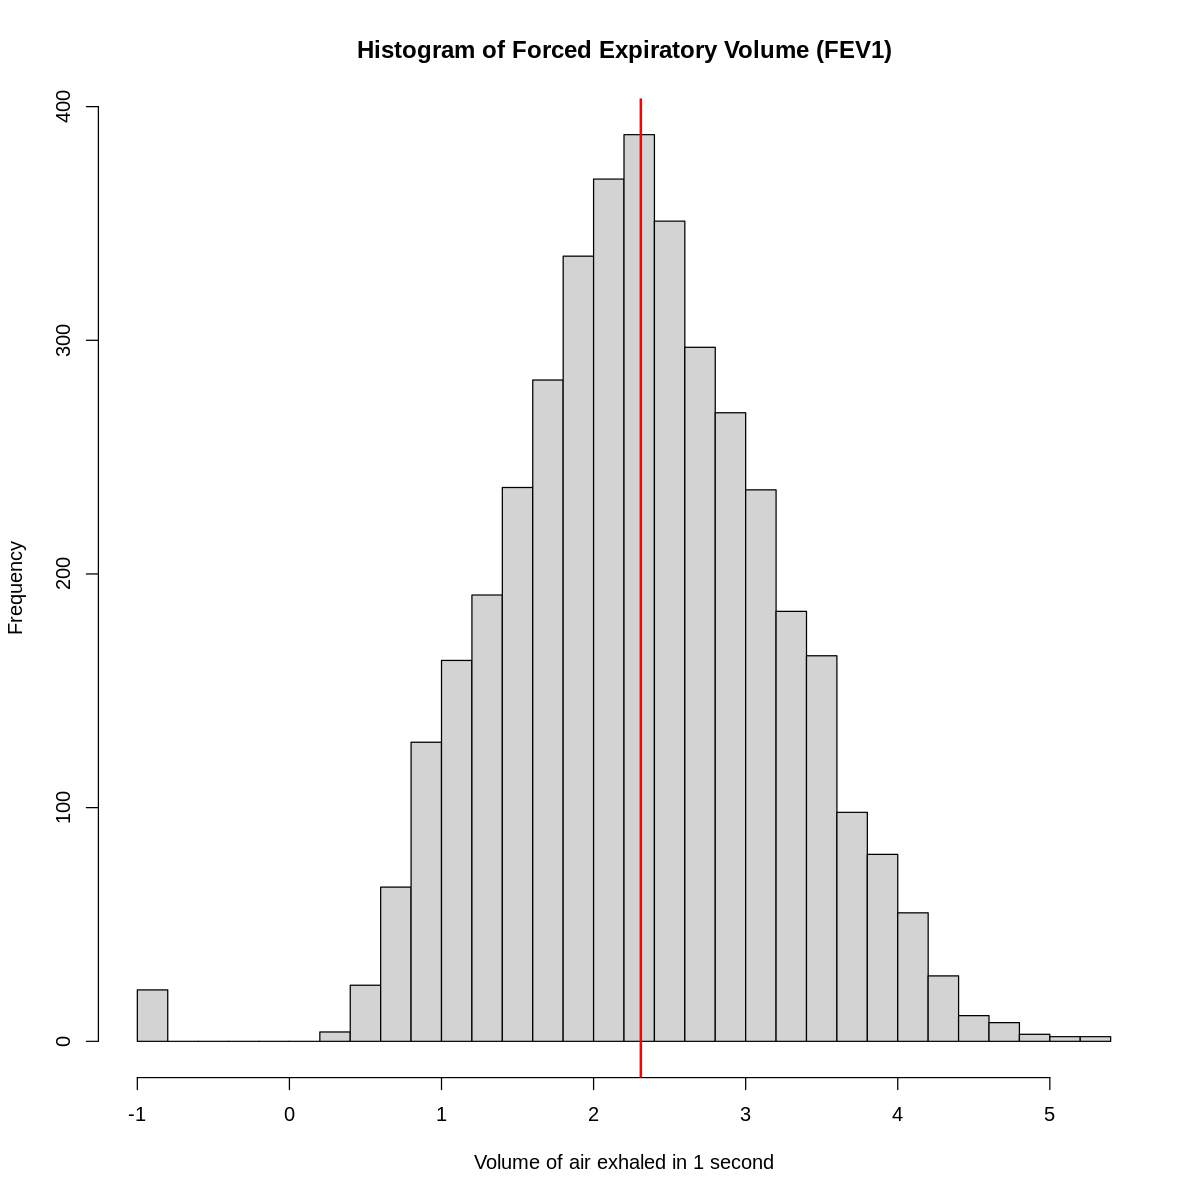

In [26]:
# histogram of FEV1
hist(dat1$FEV1,
    breaks = 24,
    xlab = "Volume of air exhaled in 1 second",
    main = "Histogram of Forced Expiratory Volume (FEV1)")
abline(v = mean(dat1$FEV1), col = "red", lwd = 2)

In [27]:
# Helper method:
percentsd_function <- function(sd_FEV1, mean_FEV1, num_sd) {
  upperbound = mean_FEV1 + sd_FEV1 * num_sd
  lowerbound = mean_FEV1 - sd_FEV1 * num_sd
  percentsd = mean(dat1$FEV1 >= lowerbound & dat1$FEV1 <= upperbound) * 100

  return (percentsd)
}

In [28]:
# Check for normality
sd_FEV1 = sd(dat1$FEV1)
mean_FEV1 = mean(dat1$FEV1)
paste("Percentage of FEV1 values within one standard deviation of its mean: ",
      one_sd = percentsd_function(sd_FEV1, mean_FEV1, 1))
paste("Percentage of FEV1 values within two standard deviation of its mean: ",
      two_sd = percentsd_function(sd_FEV1, mean_FEV1, 2))
paste("Percentage of FEV1 values within three standard deviation of its mean: ",
      three_sd = percentsd_function(sd_FEV1, mean_FEV1, 3))

[1] "Percentage of FEV1 values within one standard deviation of its mean:  67.575"

[1] "Percentage of FEV1 values within two standard deviation of its mean:  96.75"

[1] "Percentage of FEV1 values within three standard deviation of its mean:  99.35"

This indicates that FEV1 has a normal distribution among participants.



---



## **Other Variables Analysis**

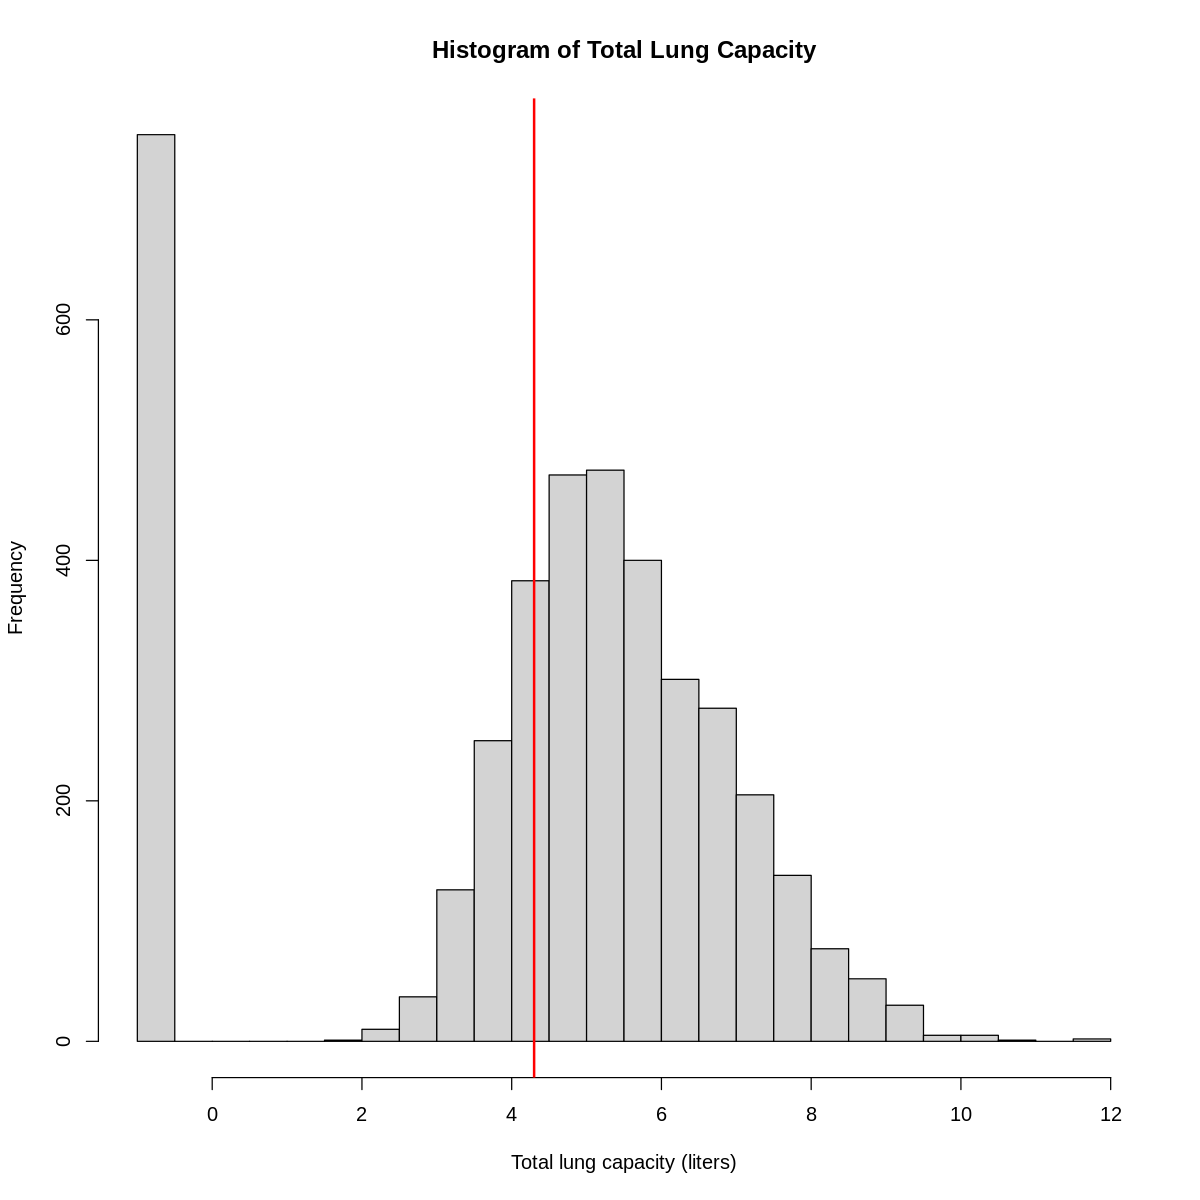

In [29]:
# Analysis of total lung capacity
hist(dat1$total_lung_capacity,
    breaks = 24,
    xlab = "Total lung capacity (liters)",
    main = "Histogram of Total Lung Capacity")
abline(v = mean(dat1$total_lung_capacity), col = "red", lwd = 2)

In [30]:
summary(dat1$total_lung_capacity)
# Find minimum total lung capacity by removing -1
min_total_LC = min(dat1$total_lung_capacity[dat1$total_lung_capacity != -1])
print(min_total_LC)
# Range of total lung capacity
paste("Range of total lung capacity:", range = max(dat1$total_lung_capacity)-min_total_LC)
paste("Standard deviation of total lung capacity:",sd(dat1$total_lung_capacity))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.000   3.669   4.965   4.300   6.159  11.702 

[1] 1.7458


[1] "Range of total lung capacity: 9.9559"

[1] "Standard deviation of total lung capacity: 2.85338619361118"

On average, the total lung capacity of participants is 4.300 liters with the range of 9.9559 liters. The distribution of total lung capacity amongst the participants seems to be somewhat symmetric with a slightly right-skewed trend. The outlier of -1.000 liters is removed from the analysis.

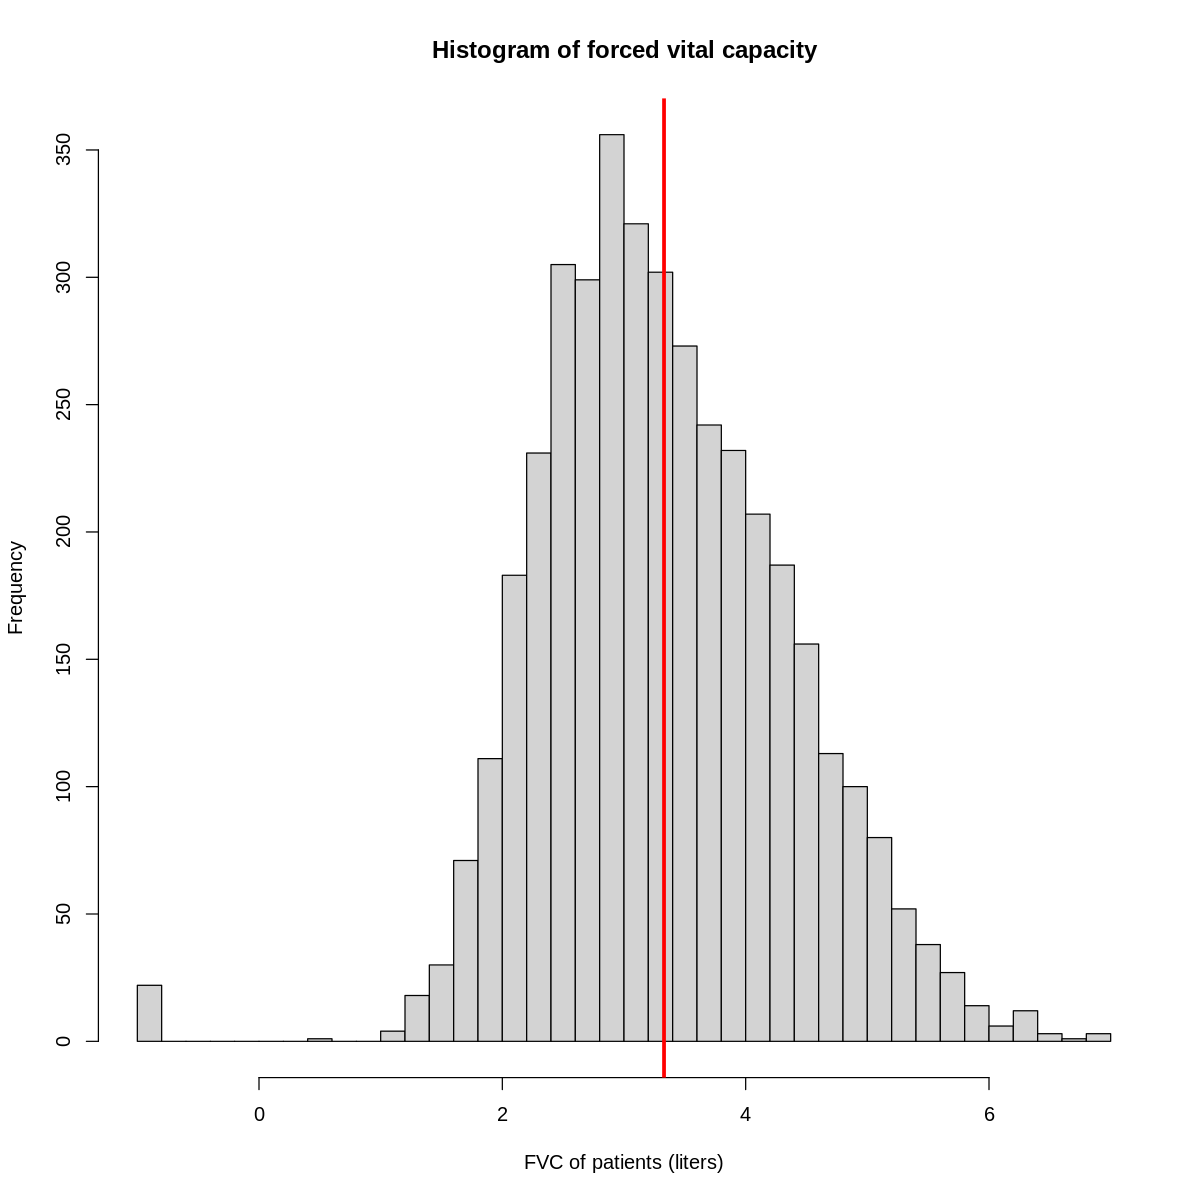

In [31]:
# Analysis of FCV
hist(dat1$FVC,
    breaks = 30,
    xlab = "FVC of patients (liters)",
    main = "Histogram of forced vital capacity")
abline(v = 3.329, col = "red", lwd = 3)

In [32]:
min(dat1$FVC[dat1$FVC > -1])

[1] 0.593

In [33]:
summary(dat1$FVC)
min_FVC = min(dat1$FVC[dat1$FVC > -1])
#Range of FVC
paste("Range of FVC in participants:", range = max(dat1$FVC) - min_FVC)
paste("Standard deviation of FVC", sd(dat1$FVC))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -1.000   2.615   3.233   3.329   3.998   6.936 

[1] "Range of FVC in participants: 6.343"

[1] "Standard deviation of FVC 1.01720299288398"

On average, the mean forced expiratory volume is 3.329 liters with the standard deviation of 1.017 liters. The distribution of FVC amongst patients seems to be somewhat symmetric with a short right tail and an outlier of -1.000 liters. If omitting the outlier, the range of FVC is approximately 6.343 liters.

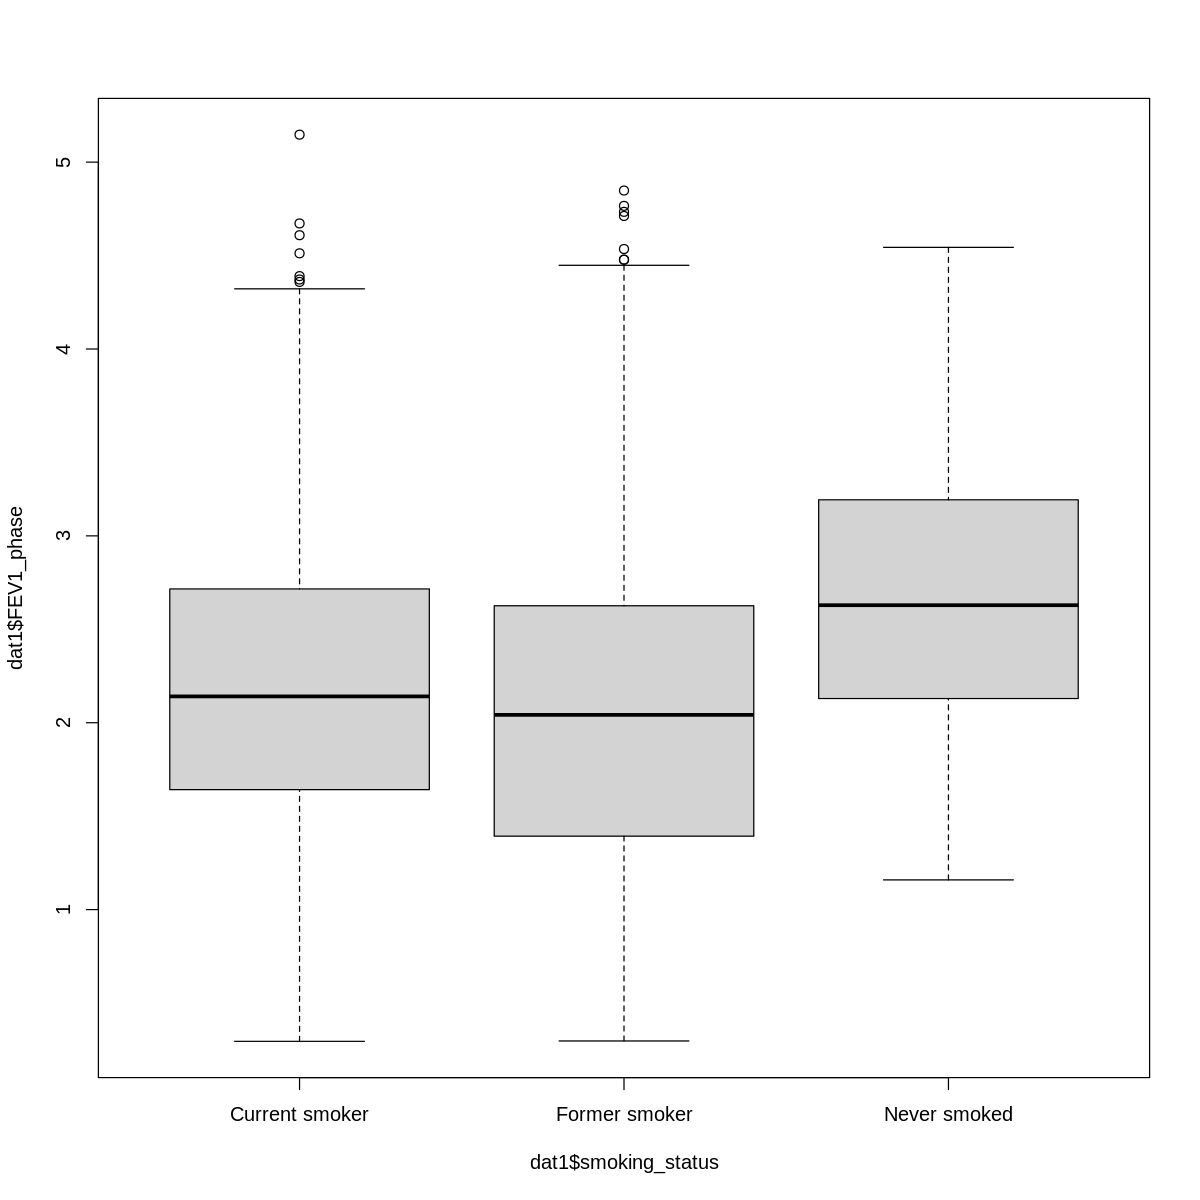

In [34]:
# Analysis of FEV1_phase2 and smoking_status
boxplot(dat1$FEV1_phase ~ dat1$smoking_status)

It shows that patients who never smoked have the best breathing capacity among all groups, following by current smoker and former smoker.

In [35]:
# t - test to analyze the
# correlation between smoking status and patients' FEV1_phase measures
current_smoker = dat1$FEV1_phase2[dat1$smoking_status == "Current smoker"]
former_smoker = dat1$FEV1_phase2[dat1$smoking_status == "Former smoker"]

dif = current_smoker - former_smoker
t.test(dif)

Warning message in current_smoker - former_smoker:
“longer object length is not a multiple of shorter object length”



	One Sample t-test

data:  dif
t = 4.9994, df = 2002, p-value = 6.251e-07
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.0797469 0.1826974
sample estimates:
mean of x 
0.1312222 


With the p-value of 6.25e-07, there seems to be a difference between FEV1_phase2 of current and former smoker. It shows that current smokers have greater volume of air exhaled in 1 second than former smoker as the confidence interval does not contain 0 in it.

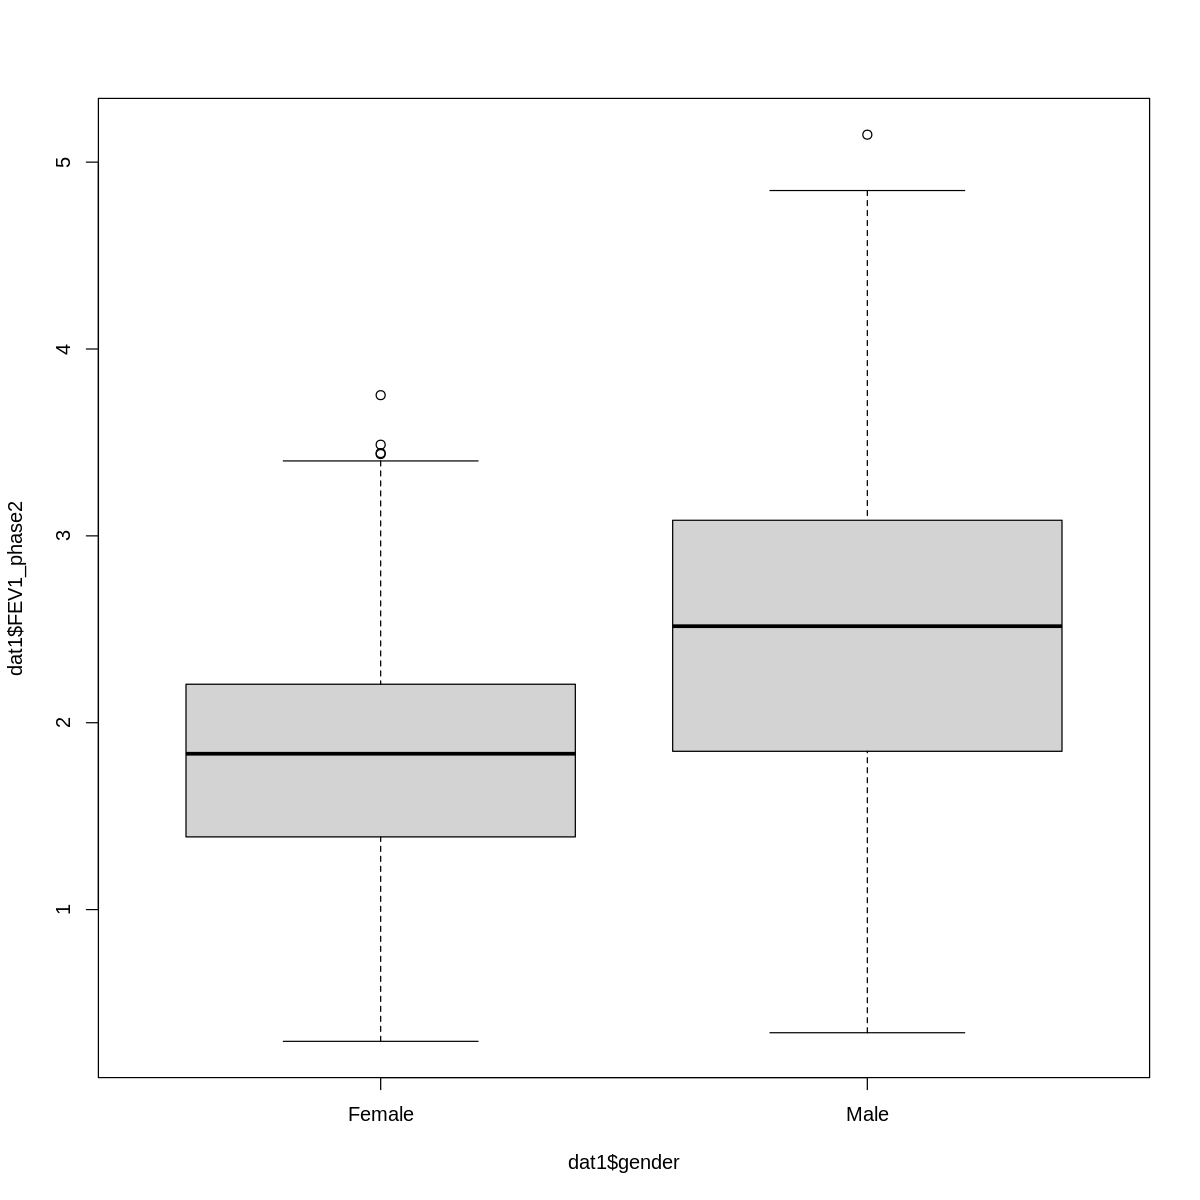

In [36]:
# Analysis of FEV1_phase2 and gender
boxplot(dat1$FEV1_phase2 ~ dat1$gender)

In [37]:
# t - test to analyze the
# correlation between genders and patients' FEV1_phase measures
female = dat1$FEV1_phase2[dat1$gender == "Female"]
male = dat1$FEV1_phase2[dat1$gender == "Male"]

dif2 = female - male
t.test(dif2)

Warning message in female - male:
“longer object length is not a multiple of shorter object length”



	One Sample t-test

data:  dif2
t = -26.776, df = 2007, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.6956447 -0.6006959
sample estimates:
 mean of x 
-0.6481703 


With the p-value  of 2.2e-16, we can say that females' average FEV1_phase2 is different than males' average FEV1_phase2. According to the data, it shows that males have greater volume of air exhaled in 1 second than females as the confidence interval consists of negative bounds.

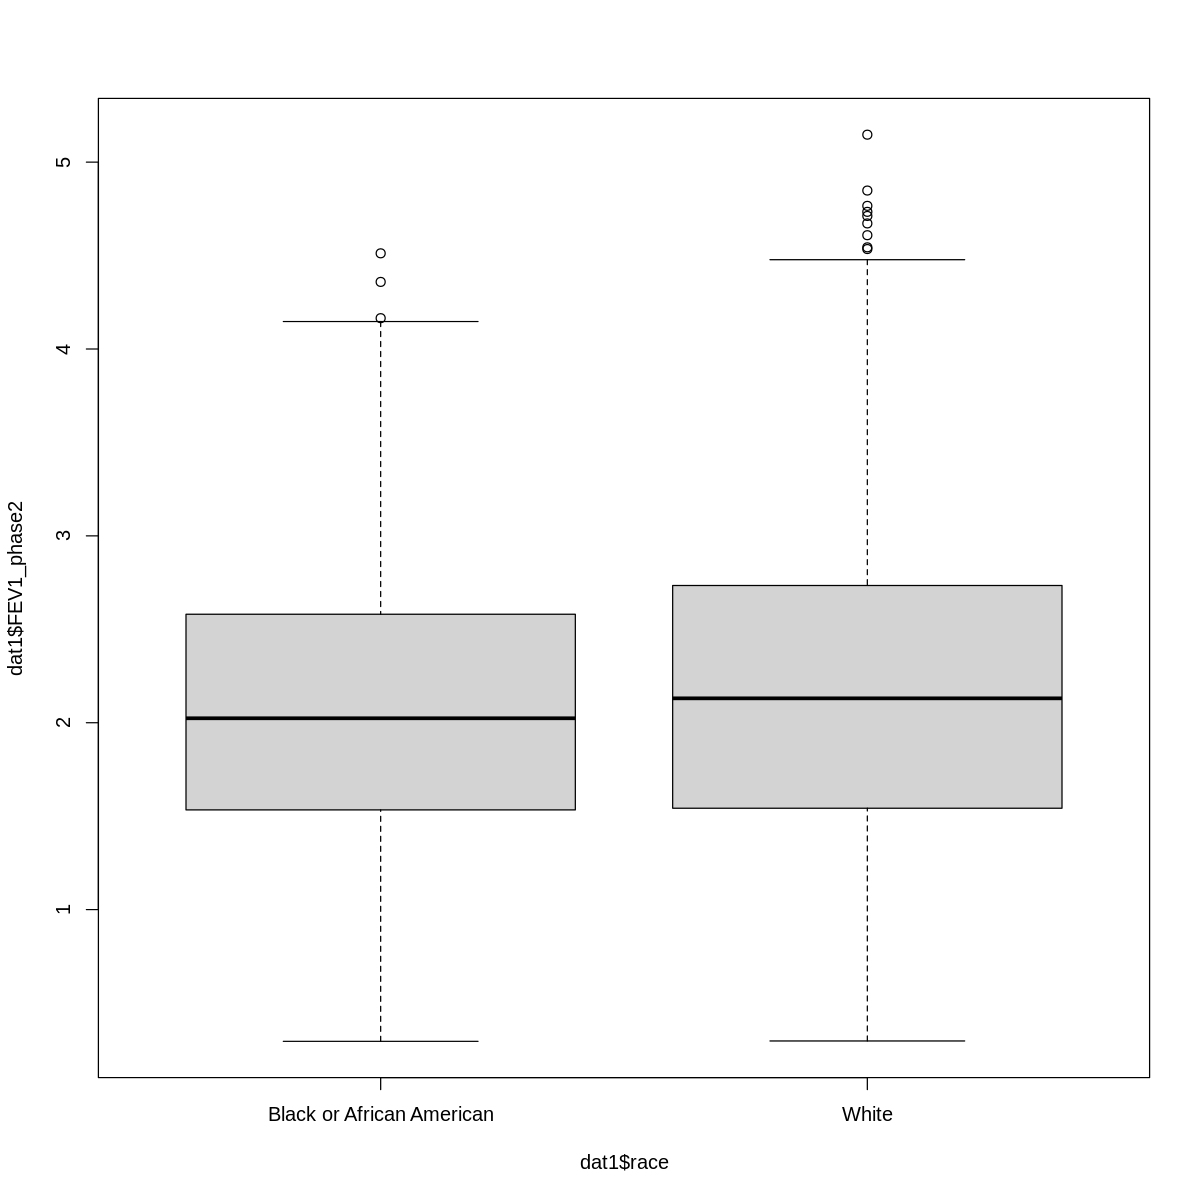

In [38]:
# Analysis of FEV1_phase2 and race
boxplot(dat1$FEV1_phase2 ~ dat1$race)

In [39]:
# t - test to analyze the
# correlation between races and patients' FEV1_phase measures
white = dat1$FEV1_phase2[dat1$race == "White"]
african_american = dat1$FEV1_phase2[dat1$race == "Black or African American"]

dif3 = white - african_american
t.test(dif3)

Warning message in white - african_american:
“longer object length is not a multiple of shorter object length”



	One Sample t-test

data:  dif3
t = 3.561, df = 2775, p-value = 0.0003756
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.0352018 0.1214704
sample estimates:
mean of x 
0.0783361 


With the p-value smaller than 0.05, there is a difference between the mean FEV1_phase2 of white patients and the mean FEV1_phase2 of African American patients. White patients seem to have higher FEV1_phase2 comparing to African American patients as the confidence interval are from 0.035 to 0.12.

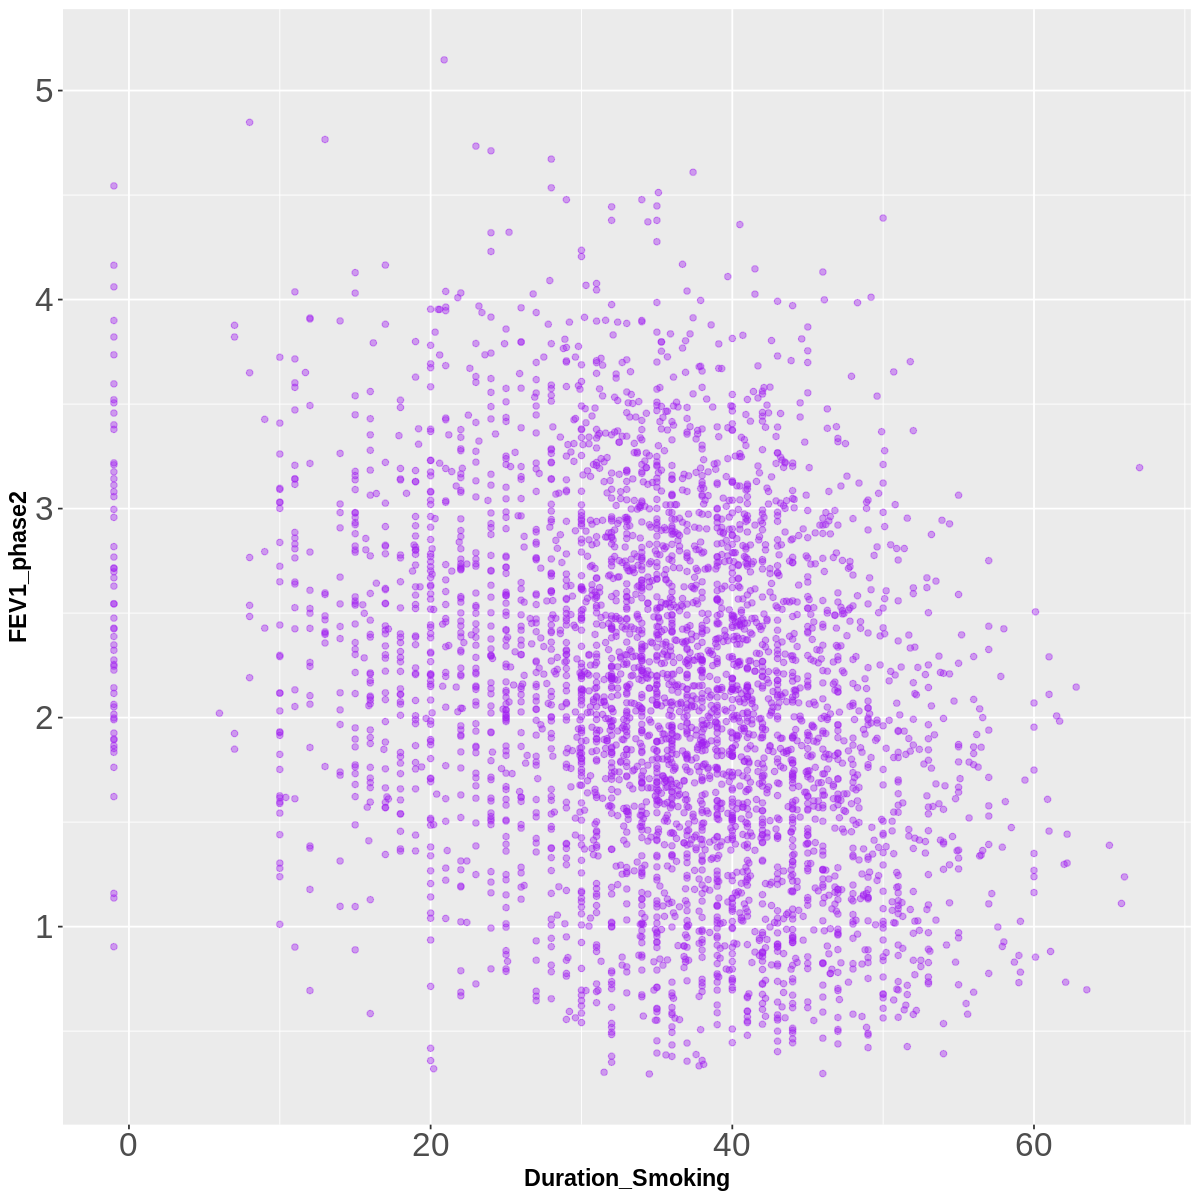

In [40]:
# Analysis of Duration_Smoking and FEV1_phase2
options(repr.plot.width = 10, repr.plot.height = 10)
g <- ggplot(dat1, aes(x = Duration_Smoking, y = FEV1_phase2)) +
            geom_point(color = "purple", alpha = 0.4) +
            theme(axis.text = element_text(size = 20),
                  axis.title = element_text(size = 14, face = "bold"))
g

There is a moderately negative correlation between the duration of smoking and FEV1_phase2. We can interpret the impact of the duration of smoking on FEV1_phase2 measures as the longer duration the patients smoke, the smaller their FEV1_phase2 is.

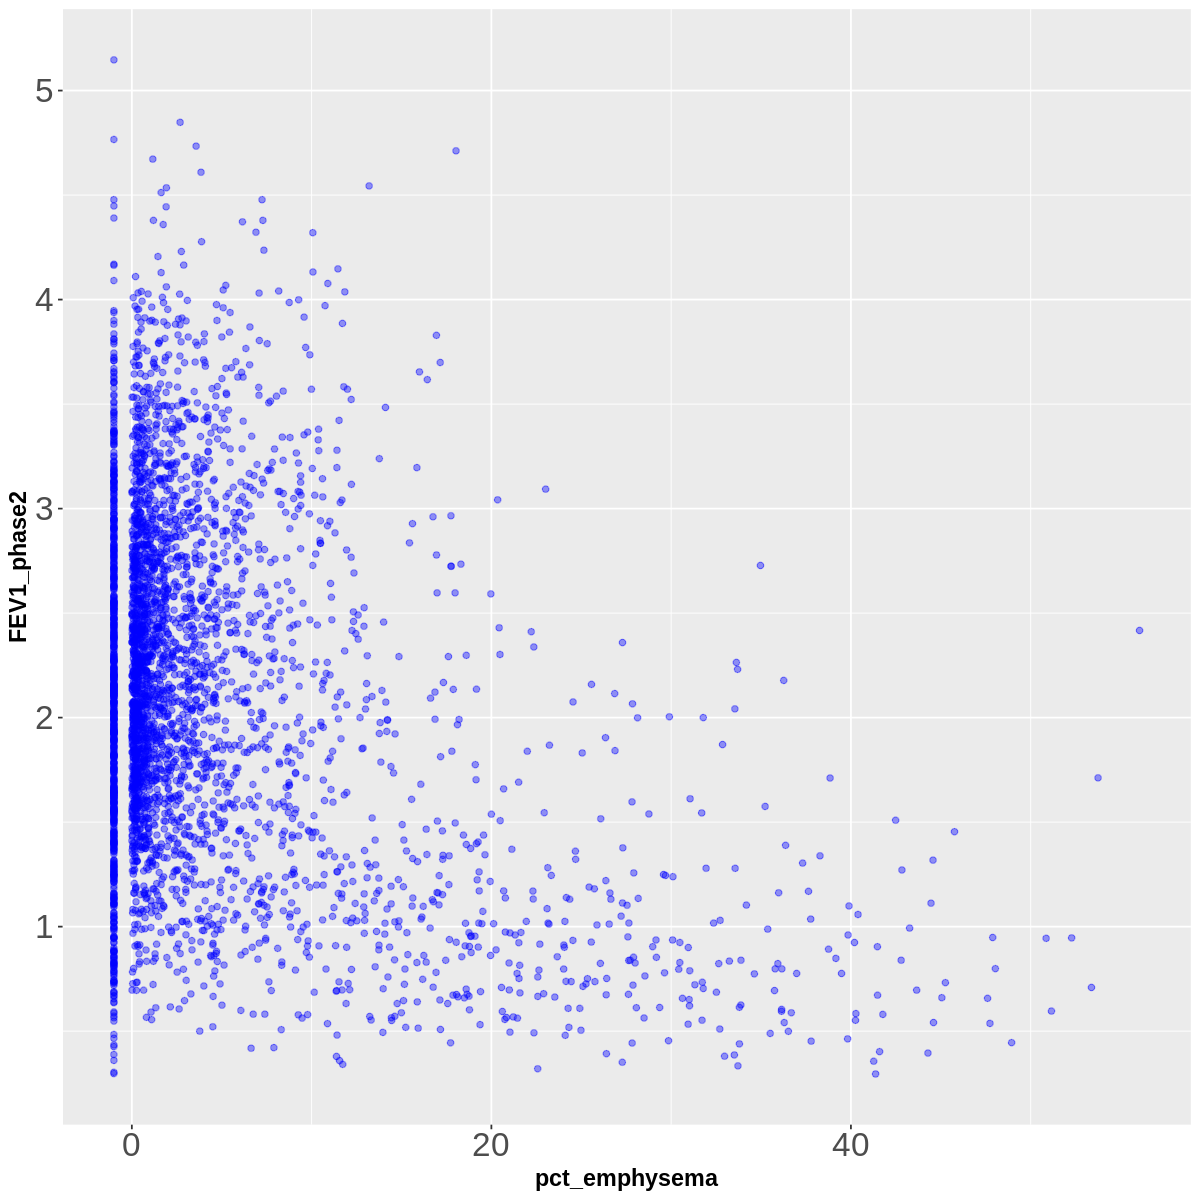

In [41]:
# Analysis of pct_emphysema and FEV1_phase2
options(repr.plot.width = 10, repr.plot.height = 10)
g <- ggplot(dat1, aes(x = pct_emphysema, y = FEV1_phase2)) +
            geom_point(color = "blue", alpha = 0.4) +
            theme(axis.text = element_text(size = 20),
                  axis.title = element_text(size = 14,face = "bold"))
g

It shows that as the percetage of emphysema increases, FEV1_phase2 decreases significantly. The more damaged the patients' lungs are, the smaller the volume of air they can exhale in 1 second.



---



# **Analysis of FEV1_phase2 and FEV1**

In [42]:
# Creating a scatterplot to visualize
# the relationship between FEV1_phase2 and FEV1
library(ggplot2)

In [43]:
head(dat1)

,sid,visit_year,visit_date,visit_age,gender,race,height_cm,weight_kg,sysBP,diasBP,⋯,total_lung_capacity,pct_emphysema,functional_residual_capacity,pct_gastrapping,insp_meanatt,exp_meanatt,FEV1_FVC_ratio,FEV1,FVC,FEV1_phase2
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10005Q,2008,1/15/2008,54.5,Female,White,159.9,73.0,130,80,⋯,5.6636,0.926851,2.4766,6.80077,-830.343,-650.526,0.77,2.921,3.805,2.622
3,10010J,2008,1/15/2008,65.9,Female,White,162.1,62.8,96,63,⋯,5.1960,1.683760,3.8993,41.34930,-833.429,-789.595,0.53,1.008,1.909,1.087
4,10015T,2008,2/15/2008,59.6,Male,White,182.9,110.0,142,88,⋯,6.3971,9.330450,-1.0000,-1.00000,-841.315,-1.000,0.51,1.906,3.732,2.002
5,10017X,2008,6/15/2008,67.5,Male,White,179.1,83.0,106,72,⋯,7.8935,36.262400,4.1043,46.17690,-887.947,-792.397,0.57,2.748,4.827,2.178
6,10022Q,2008,2/15/2008,69.8,Female,White,158.8,78.0,122,78,⋯,5.1016,30.484400,-1.0000,-1.00000,-865.608,-1.000,0.53,1.076,2.047,0.924
7,10025W,2008,2/15/2008,68.9,Male,Black or African American,168.9,51.0,120,60,⋯,6.4421,51.156200,-1.0000,-1.00000,-906.021,-1.000,0.27,0.718,2.697,0.596


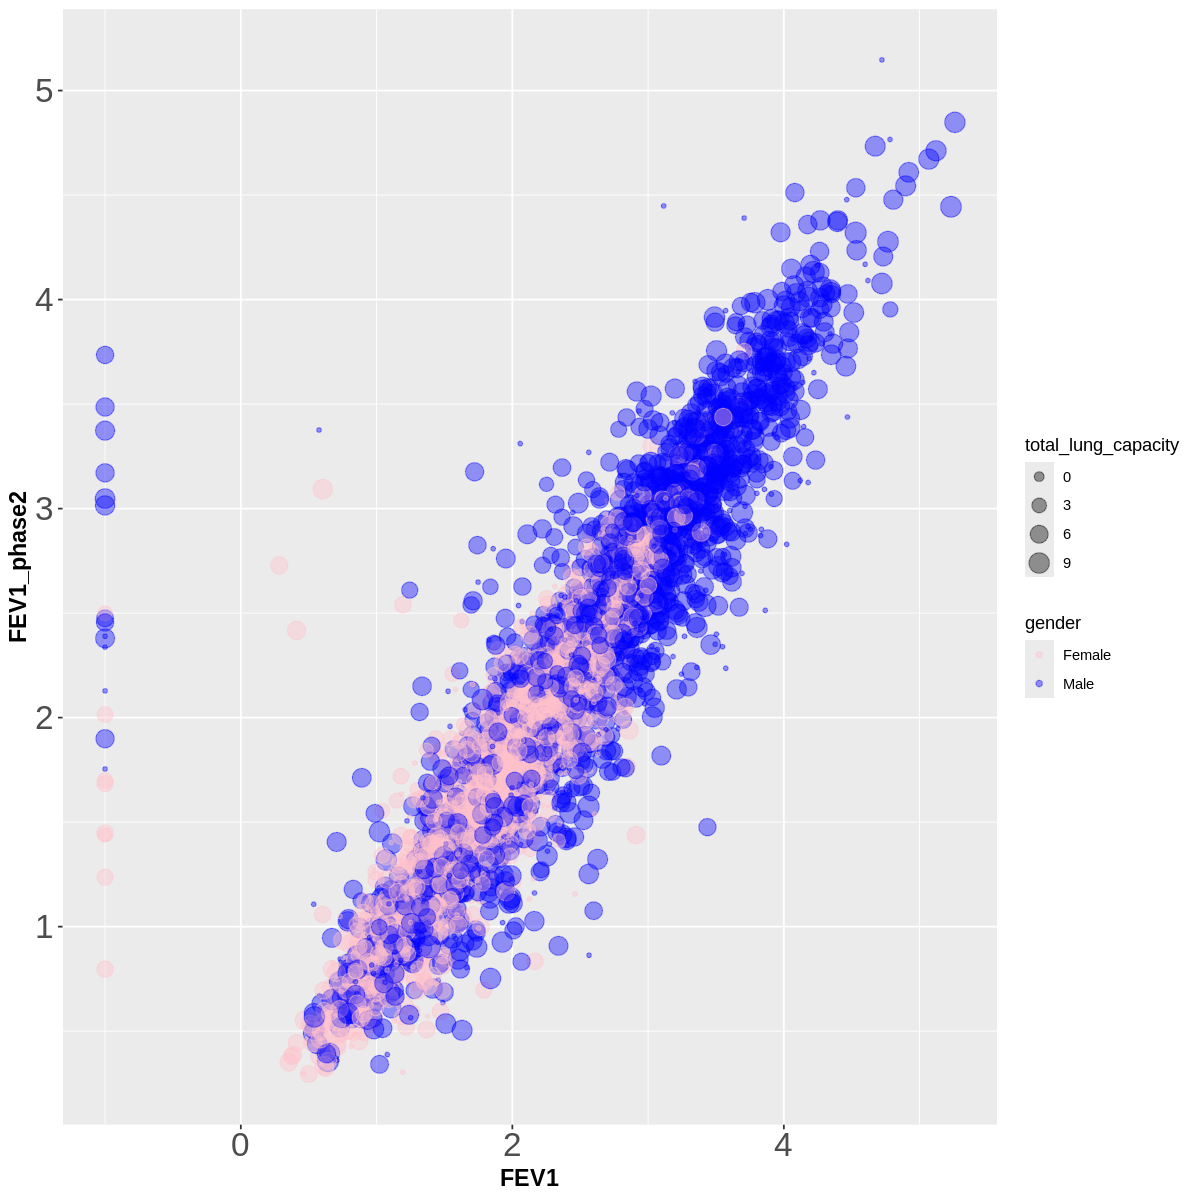

In [44]:
# Analysis of FEV1 and FEV1_phase2
options(repr.plot.width = 10, repr.plot.height = 10)
g <- ggplot(dat1, aes(x=FEV1, y=FEV1_phase2)) +
            geom_point(aes(size=total_lung_capacity, color=gender), alpha = 0.4) +
            scale_color_manual(values = c("Male" = "blue", "Female" = "pink")) +
            theme(axis.text=element_text(size=20),
                  axis.title=element_text(size=14,face="bold"))
g

There is a positive correlation between FEV1 and FEV1_phase2. The majority of female patients have lower FEV1-FEV1_phase2 comparing to male patients.

In [45]:
# Fit a simple regression model for further
# analysis of the relationship between FEV1 and FEV1_phase2
fit = lm(FEV1_phase2 ~ FEV1, data = dat1)
summary(fit)


Call:
lm(formula = FEV1_phase2 ~ FEV1, data = dat1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.5909 -0.1880 -0.0144  0.1609  4.3971 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.178336   0.016943   10.53   <2e-16 ***
FEV1        0.840423   0.006859  122.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3789 on 3998 degrees of freedom
Multiple R-squared:  0.7897,	Adjusted R-squared:  0.7897 
F-statistic: 1.501e+04 on 1 and 3998 DF,  p-value: < 2.2e-16


In [46]:
confint(fit)

,2.5 %,97.5 %
(Intercept),0.1451177,0.2115549
FEV1,0.8269759,0.8538708


With the above data, we can conclude that 78.97% of the variance in FEV1_phase2 is explained by FEV1. Every unit increases in FEV1 measures, the expected increases in FEV1_phase is approximately 0.84 liters, supported by our confidence interval. This suggests that FEV1 is a great predictor on patients' breathing health in the future, and interventions aimed at improving FEV1 now could lead to meaningful improvements in lung function and overall well-being of the patients in the future.





---



# **FEV1_phase2 Prediction Model**

In [47]:
# Training set
samp = sample(1:nrow(dat1), 3200)
train = dat1[samp, ]
paste("Number of rows in training set:", nrow(train))

# Validation set
valid = dat1[-samp, ]
paste("Number of rows in validation set:", nrow(valid))

[1] "Number of rows in training set: 3200"

[1] "Number of rows in validation set: 800"

In [48]:
# Mean squared error helper function
mse <- function(true, pred) {
  return (mean((true-pred)^2))
}

In [49]:
# Load random forest library
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [50]:
# Random Forest Model
fit <- randomForest(FEV1_phase2 ~ .,
                    data = train[,-c(1:3)],
                    importance = TRUE,
                    ntree = 1500,
                    mtry = 10,
                    nodesize = 6,
                    maxnodes = NULL,)

In [51]:
# Calculate MSE on validation set
mse_fit = mse(valid$FEV1_phase2, predict(fit, newdata = valid))
paste("MSE of the model on validation set:", mse_fit)
sqrt_mse_fit = sqrt(mse_fit)
paste("RMSE of the model on validation set:", sqrt_mse_fit)

[1] "MSE of the model on validation set: 0.078434497007602"

[1] "RMSE of the model on validation set: 0.280061595024384"

In [52]:
# Calculate variance of the FEV1_phase2
fit_variance =var(train$FEV1_phase2)
paste("Variance of FEV1_phas2:", fit_variance)
# Calculate R-Squared Value
r_square = 1 - (mse_fit / fit_variance)
paste("R-squared value:", r_square)

[1] "Variance of FEV1_phas2: 0.675104995798589"

[1] "R-squared value: 0.883818817079229"

In [53]:
# Error percentage of the prediction model
FEV1_phase2_range = max(dat1$FEV1_phase2) - min(dat1$FEV1_phase2)
errorpct = mse_fit / FEV1_phase2_range
paste("Error percentage:", errorpct)

[1] "Error percentage: 0.016165395096373"

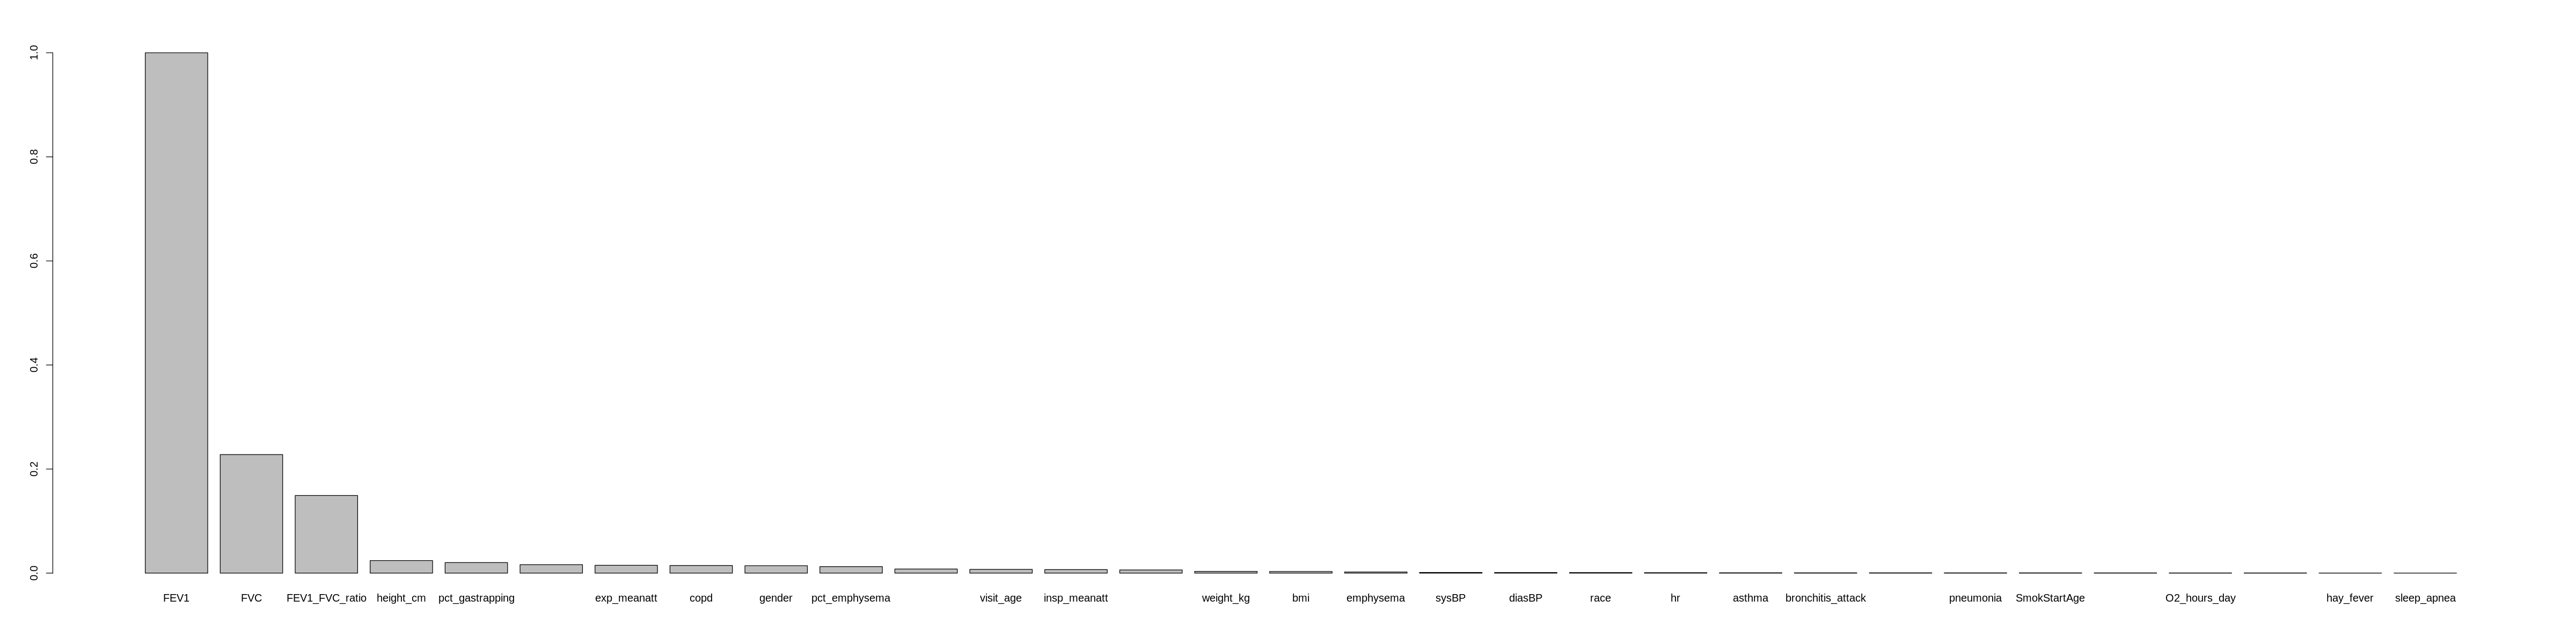

In [54]:
# Evaluate the variables importance in FEV1_phase2 prediction model
options(repr.plot.width = 40, repr.plot.height = 10)

importance = fit$importance[, 1]
importance = sort(importance, decreasing = TRUE) / max(importance)
barplot(importance)

In [55]:
# Use model to predict FEV1_phase2 in dat2
FEV1_phase2_prediction = predict(fit, newdata = dat2)
preds = data.frame(sid = dat2$sid, FEV1_phase2_prediction)
preds

,sid,FEV1_phase2_prediction
,<chr>,<dbl>
2,10006S,0.9870600
8,10031R,1.8161694
9,10032T,1.2202309
12,10052Z,1.4342466
13,10055F,2.6621619
15,10057J,1.9578132
22,10072F,1.3279729
23,10075L,1.0731336
29,10089W,1.1975328




---



# **Findings and Conclusion**

### Smoking Status and Lung Function:

Patients who never smoked exhibited the best lung function, as evidenced by higher FEV1 values, while former smokers displayed the worst lung function among all groups. The study revealed a signigicant different in FEV1 between former and current smokers. This can be explained by the cumulative damage former smokers experienced over years of smoking compared to patients who are currently smoking, as well as other factors such as age and other underlying environmental factors.

### Duration of Smoking

I found a moderately negative correlation between the duration of smoking and patients' FEV1 after five years, suggesting that prolonged smoking aggrevates lung function. This emphasizes the importance of early smoking cesstion intervations in preventing COPD progression.

### Gender Differences

Female patients exhibited significantly lower FEV1 values after five years compared to their counterparts. This difference underscores the need for gender-specific approaches in COPD treatment and preventative care.

### Baseline FEV1 (Initial FEV1)

A positive correlation exists between baseline FEV1 and FEV1 after years, with most female patients clustered at the lower end of this correlation. This finding indicates that patients with higher initial lung function are likely to maintain higher lung function over time, further highlighting the importance of a gender-focused approach in studying COPD progression.

### Ethinic Disparities

White patients demonstrated markedly higher FEV1 after five years compared to African American patients. The significant differences between these two ethnic groups suggest possible socioeconomic risks affecting the health of minority ethnic groups, emphasizing the African American community in this study.

### Emphysema and Lung Function

A strong negative correlation was found between the percentage of emphysema and FEV1 after five years, suggesting that increasing emphysema is associated with a significant deadline in lung function. Addressing underlying diseases such as emphysema is crucial in developing effective preventative and treatment strategies for COPD patients.

### Model Development

Using the overall findings, I developed a random forest model for predicting FEV1 after five years, which is heavily influenced by variables such as initial FEV1 measure, forced vital capacity (FVC), ratio between FEV1 and FVC and other variables. The random forest model yieled a MSE of 0.00022, indicating that on average, the squared difference between the actual and predicted FEV1 values is 0.00022 liters. This suggests that the model's predictions are close to the true values, effectively capturing the underlying relationships between the predictor variables and FEV1 outcomes.

### Conclusion

The study emphasizes the multifactorial nature of COPD progression and underscores the importance of group-focused, multidisciplinary approaches in COPD treatment and prevention. Targeted interventions, including smoking cessation, addressing gender-specific disparities, recognizing ethnic variations, and managing coexisting diseases such as emphysema, are significant for optimizing clinical outcomes, improving the quality of life for COPD patients, and ultimately establishing better preventative measures for COPD.